# sigma_el_h_h

In [1]:
import numpy as np

In [2]:


def sigma_el_h_h(E, vis=False):
    """
    Compute the elastic scattering cross-section for hydrogen-hydrogen collisions.

    This function calculates either the momentum transfer cross-section or the viscosity
    cross-section for elastic scattering between hydrogen atoms, depending on the `vis` flag.

    Parameters:
    -----------
    E : float or numpy.ndarray
        Energy of the incident hydrogen atom in eV. If a scalar is provided, it will be
        converted to a numpy array.
    vis : bool, optional
        If True, the viscosity cross-section is returned. If False (default), the momentum
        transfer cross-section is returned.

    Returns:
    --------
    numpy.ndarray or float
        The elastic scattering cross-section in m². If the input `E` is a scalar, the output
        will also be a scalar. Otherwise, it will be an array of the same shape as `E`.

    Notes:
    ------
    - The energy values (E) are clipped to the range [0.03, 1.01e4] eV to ensure the validity
      of the empirical formula.
    - The empirical coefficients are taken from:
        - Momentum transfer cross-section: Unknown source (similar to Janev or Freeman).
        - Viscosity cross-section: Unknown source (similar to Janev or Freeman).
    """
    # Convert E to a numpy array and clip to the valid range
    E = np.asarray(E, dtype=np.float64)
    E = np.clip(E, 0.03, 1.01e4)

    if vis: ### vis = True
        # Coefficients for the viscosity cross-section
        a = np.flip(np.array([-3.344860e1, -4.238982e-1, -7.477873e-2, -7.915053e-3, -2.686129e-4]))
    else:   ### vis = False
        # Coefficients for the momentum transfer cross-section
        a = np.flip(np.array([-3.330843e1, -5.738374e-1, -1.028610e-1, -3.920980e-3, 5.964135e-4]))

    # Compute the cross-section using the polynomial expansion
    result = np.exp(np.polyval(a, np.log(E))) * 1e-4
    return result




In [3]:
# Ejemplo con E como escalar
E_scalar = 100.0  # Energía en eV
# Calcular la sección transversal de transferencia de momento
sigma_momentum_scalar = sigma_el_h_h(E_scalar)
print(f"Sección transversal de transferencia de momento (E = {E_scalar} eV): {sigma_momentum_scalar} m²")
# Calcular la sección transversal de viscosidad
sigma_viscosity_scalar = sigma_el_h_h(E_scalar, vis=True)
print(f"Sección transversal de viscosidad (E = {E_scalar} eV): {sigma_viscosity_scalar} m²")

Sección transversal de transferencia de momento (E = 100.0 eV): 2.451663585002522e-21 m²
Sección transversal de viscosidad (E = 100.0 eV): 3.537832541422899e-21 m²


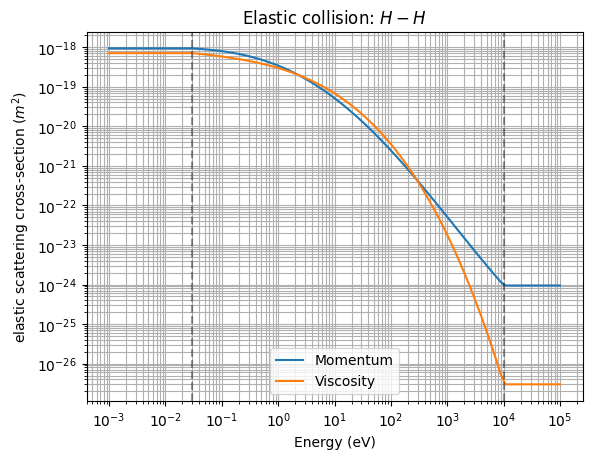

In [4]:
# Ejemplo con E como array
E_array = np.logspace(-3,5,100)  # Energías en eV
# Calcular la sección transversal de transferencia de momento
sigma_momentum_array = sigma_el_h_h(E_array)
# Calcular la sección transversal de viscosidad
sigma_viscosity_array = sigma_el_h_h(E_array, vis=True)
import matplotlib.pyplot as plt
plt.plot(E_array,sigma_momentum_array,label='Momentum')
plt.plot(E_array,sigma_viscosity_array,label='Viscosity')
plt.title(r'Elastic collision: $H-H$')
plt.axvline(0.03  ,color='k',linestyle='--',alpha=0.4)
plt.axvline(1.01e4,color='k',linestyle='--',alpha=0.4)
plt.xlabel('Energy (eV)')
plt.ylabel(r'elastic scattering cross-section ($m^2$)')
plt.yscale('log')
plt.xscale('log')
plt.grid(True,'both')
plt.legend()
plt.show()

# sigma_el_h_hh

In [5]:
import numpy as np

def sigma_el_h_hh(E: np.ndarray) -> np.ndarray:
    """
    Compute the momentum transfer cross-section for elastic collisions of H with H2.

    This function calculates the cross-section for elastic scattering between a hydrogen atom (H)
    and a hydrogen molecule (H2) as a function of the incident hydrogen atom's energy (E).

    Parameters:
    -----------
    E : float or numpy.ndarray
        Energy of the incident hydrogen atom in eV. If a scalar is provided, it will be
        converted to a numpy array.

    Returns:
    --------
    numpy.ndarray or float
        The momentum transfer cross-section in m². If the input `E` is a scalar, the output
        will also be a scalar. Otherwise, it will be an array of the same shape as `E`.

    Notes:
    ------
    - The energy values (E) are clipped to the range [0.03, 1.01e4] eV to ensure the validity
      of the empirical formula.
    - The empirical coefficients are taken from:
        Janev, R. K., et al. (1995). "Atomic and Molecular Processes in Fusion Edge Plasmas",
        Chapter 11, page 305.
    - The formula used is a polynomial expansion in log(E), with coefficients stored in the list `a`.
    """
    # Convert E to a numpy array and clip to the valid range
    E = np.asarray(E, dtype=np.float64)
    E = np.clip(E, 0.03, 1.01e4)

    # Coefficients for the polynomial expansion
    a = np.flip(np.array([
        -3.495671e1, -4.062257e-1, -3.820531e-2, -9.404486e-3, 3.963723e-4
    ]))

    # Compute the cross-section using the polynomial expansion
    result = np.exp(np.polyval(a, np.log(E))) * 1e-4

    return result

In [6]:
# Energía del átomo de hidrógeno en eV
E_scalar = 100.0

# Calcular la sección transversal de transferencia de momento
sigma_scalar = sigma_el_h_hh(E_scalar)
print(f"Sección transversal de transferencia de momento (E = {E_scalar} eV): {sigma_scalar} m²")
# Array de energías del átomo de hidrógeno en eV
E_array = np.array([0.1, 1.0, 10.0, 100.0, 1000.0])

# Calcular la sección transversal de transferencia de momento
sigma_array = sigma_el_h_hh(E_array)
print("Secciones transversales de transferencia de momento (E_array):", sigma_array)

Sección transversal de transferencia de momento (E = 100.0 eV): 2.151238106997014e-21 m²
Secciones transversales de transferencia de momento (E_array): [1.55399291e-19 6.58405942e-20 1.90227972e-20 2.15123811e-21
 7.14115044e-23]


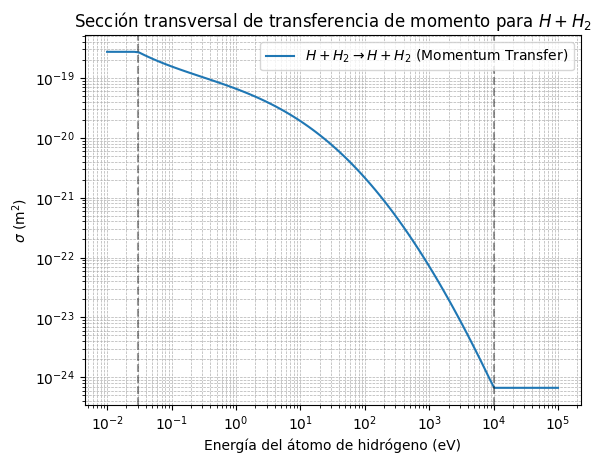

In [7]:
import matplotlib.pyplot as plt

# Definir el rango de energías
E = np.logspace(-2, 5, 100)  # Desde 0.1 eV hasta 10,000 eV

# Calcular la sección transversal
sigma = sigma_el_h_hh(E)

# Graficar los resultados
plt.plot(E, sigma, label=r'$H + H_2 \rightarrow H + H_2$ (Momentum Transfer)')
plt.axvline(0.03  ,color='k',linestyle='--',alpha=0.4)
plt.axvline(1.01e4,color='k',linestyle='--',alpha=0.4)
plt.yscale('log')
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Energía del átomo de hidrógeno (eV)')
plt.ylabel(r'$\sigma$ (m$^2$)')
plt.title('Sección transversal de transferencia de momento para $H + H_2$')
plt.legend()
plt.show()

# sigma_el_hh_hh

In [8]:
import numpy as np

def sigma_el_hh_hh(E, vis: bool = False) -> np.ndarray:
    """
    Compute the momentum transfer or viscosity cross-section for elastic collisions of H2 with H2.

    This function calculates the cross-section for elastic scattering between two hydrogen molecules (H2)
    as a function of the incident hydrogen molecule's energy (E). The cross-section can be either the
    momentum transfer cross-section or the viscosity cross-section, depending on the `vis` flag.

    Parameters:
    -----------
    E : float or numpy.ndarray
        Energy of the incident hydrogen molecule in eV. If a scalar is provided, it will be
        converted to a numpy array.
    vis : bool, optional
        If True, the viscosity cross-section is returned. If False (default), the momentum
        transfer cross-section is returned.

    Returns:
    --------
    numpy.ndarray or float
        The cross-section in m². If the input `E` is a scalar, the output will also be a scalar.
        Otherwise, it will be an array of the same shape as `E`.

    Notes:
    ------
    - The energy values (E) are clipped to the range [0.03, 1.01e4] eV to ensure the validity
      of the empirical formula.
    - The empirical coefficients are taken from:
        Janev, R. K., et al. (1995). "Atomic and Molecular Processes in Fusion Edge Plasmas",
        Chapter 11, page 305.
    - The formula used is a polynomial expansion in log(E), with coefficients stored in the list `a`.
    """
    # Convert E to a numpy array and clip to the valid range
    E = np.asarray(E, dtype=np.float64)
    E = np.clip(E, 0.03, 1.01e4)

    # Coefficients for the polynomial expansion (in reverse order for np.polyval)
    a = np.flip(np.array([
        -3.430345e1, -2.960406e-1, -6.382532e-2, -7.557519e-3, 2.606259e-4
        ]))

    # Compute the cross-section using the polynomial expansion
    result = np.exp(np.polyval(a, np.log(E))) * 1e-4

    # If vis is True, print a warning (as in the IDL code)
    if vis:
        print("WARNING in sigma_el_hh_hh => using momentum transfer as viscosity cross-section")

    return result

In [9]:
# Energía de la molécula de hidrógeno en eV
E_scalar = 100.0

# Calcular la sección transversal de transferencia de momento
sigma_momentum_scalar = sigma_el_hh_hh(E_scalar)
print(f"Sección transversal de transferencia de momento (E = {E_scalar} eV): {sigma_momentum_scalar} m²")

# Calcular la sección transversal de viscosidad
sigma_viscosity_scalar = sigma_el_hh_hh(E_scalar, vis=True)
print(f"Sección transversal de viscosidad (E = {E_scalar} eV): {sigma_viscosity_scalar} m²")

Sección transversal de transferencia de momento (E = 100.0 eV): 4.49387617609965e-21 m²
WARNING in sigma_el_hh_hh => using momentum transfer as viscosity cross-section
Sección transversal de viscosidad (E = 100.0 eV): 4.49387617609965e-21 m²


In [10]:
# %matplotlib qt

WARNING in sigma_el_hh_hh => using momentum transfer as viscosity cross-section


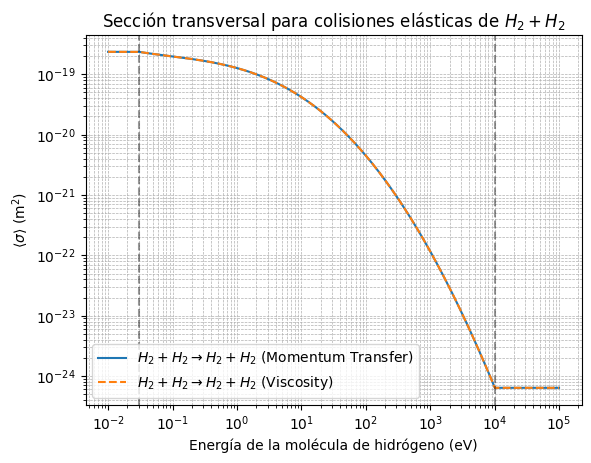

In [11]:
import matplotlib.pyplot as plt

# Definir el rango de energías
E = np.logspace(-2, 5, 1000)  # Desde 0.1 eV hasta 10,000 eV

# Calcular la sección transversal de transferencia de momento
sigma_momentum = sigma_el_hh_hh(E)
# Calcular la sección transversal de viscosidad
sigma_viscosity = sigma_el_hh_hh(E, vis=True)
import matplotlib.pyplot as plt
# Graficar los resultados
plt.plot(E, sigma_momentum, label=r'$H_2 + H_2 \rightarrow H_2 + H_2$ (Momentum Transfer)')
plt.plot(E, sigma_viscosity, label=r'$H_2 + H_2 \rightarrow H_2 + H_2$ (Viscosity)', linestyle='--')
plt.axvline(0.03  ,color='k',linestyle='--',alpha=0.4)
plt.axvline(1.01e4,color='k',linestyle='--',alpha=0.4)
plt.yscale('log')
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Energía de la molécula de hidrógeno (eV)')
plt.ylabel(r'$\langle\sigma\rangle$ (m$^2$)')
plt.title('Sección transversal para colisiones elásticas de $H_2 + H_2$')
plt.legend()
plt.show()

# sigma_el_p_h

In [12]:
import numpy as np

def sigma_el_p_h(E: np.ndarray) -> np.ndarray:
    """
    Compute the momentum transfer cross-section for elastic collisions of H+ with H.

    This function calculates the cross-section for elastic scattering between a proton (H+)
    and a hydrogen atom (H) as a function of the incident proton's energy (E).

    Parameters:
    -----------
    E : float or numpy.ndarray
        Energy of the incident proton in eV. If a scalar is provided, it will be
        converted to a numpy array.

    Returns:
    --------
    numpy.ndarray or float
        The momentum transfer cross-section in m². If the input `E` is a scalar, the output
        will also be a scalar. Otherwise, it will be an array of the same shape as `E`.

    Notes:
    ------
    - The energy values (E) are clipped to the range [0.001, 1.01e5] eV to ensure the validity
      of the empirical formula.
    - The empirical coefficients are taken from:
        Janev, R. K., et al. (1995). "Atomic and Molecular Processes in Fusion Edge Plasmas",
        Chapter 11, page 298.
    - The formula uses two sets of coefficients depending on the energy range:
        - For E ≤ 10.0 eV: A 7-term polynomial expansion in log(E).
        - For E > 10.0 eV: A 2-term polynomial expansion in log(E).
    """
    # Convert E to a numpy array and clip to the valid range
    E = np.asarray(E, dtype=np.float64)
    E = np.clip(E, 0.001, 1.01e5)

    # Initialize the result array with zeros
    result = np.zeros_like(E)

    # Coefficients for the low-energy range (E ≤ 10.0 eV)
    a_low = np.flip(np.array([
        -3.233966e1, -1.126918e-1, 5.287706e-3, -2.445017e-3, -1.044156e-3, 8.419691e-5, 3.824773e-5
    ]))

    # Coefficients for the high-energy range (E > 10.0 eV)
    a_high = np.flip(np.array([
        -3.231141e1, -1.386002e-1
    ]))

    # Compute the cross-section for the low-energy range
    mask_low = E <= 10.0
    if np.any(mask_low):
        result[mask_low] = np.exp(np.polyval(a_low, np.log(E[mask_low]))) * 1e-4

    # Compute the cross-section for the high-energy range
    mask_high = E > 10.0
    if np.any(mask_high):
        result[mask_high] = np.exp(np.polyval(a_high, np.log(E[mask_high]))) * 1e-4

    return result

In [13]:
# Energía del protón en eV
E_scalar_low = 5.0  # Energía en el rango bajo (E ≤ 10.0 eV)
E_scalar_high = 100.0  # Energía en el rango alto (E > 10.0 eV)

# Calcular la sección transversal
sigma_low = sigma_el_p_h(E_scalar_low)
sigma_high = sigma_el_p_h(E_scalar_high)

print(f"Sección transversal (E = {E_scalar_low} eV): {sigma_low} m²")
print(f"Sección transversal (E = {E_scalar_high} eV): {sigma_high} m²")

Sección transversal (E = 5.0 eV): 7.506862901226863e-19 m²
Sección transversal (E = 100.0 eV): 4.899283089262473e-19 m²


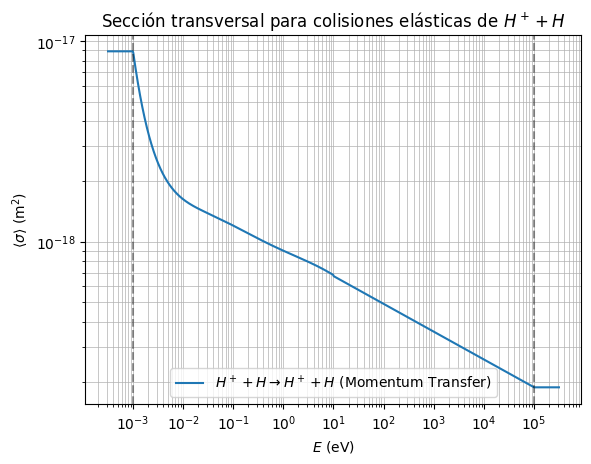

In [14]:
import matplotlib.pyplot as plt

# Definir el rango de energías
E = np.logspace(-3.5, 5.5, 1000)  # Desde 0.001 eV hasta 100,000 eV

# Calcular la sección transversal
sigma = sigma_el_p_h(E)

# Graficar los resultados
plt.plot(E, sigma, label=r'$H^+ + H \rightarrow H^+ + H$ (Momentum Transfer)')
plt.axvline(0.001 , color='k',linestyle='--',alpha=0.4)
plt.axvline(1.01e5, color='k',linestyle='--',alpha=0.4)
plt.yscale('log')
plt.xscale('log')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.xlabel(r'$E$ (eV)')
plt.ylabel(r'$\langle\sigma\rangle$ (m$^2$)')
plt.title('Sección transversal para colisiones elásticas de $H^+ + H$')
plt.legend()
plt.show()

Uso de máscaras

In [15]:
import numpy as np

E = np.array([1, 5, 10, 15, 20])  # Example energy values

mask_low = E <= 10.0
mask_high = E > 10.0

print("E:", E)
print("mask_low:", mask_low)   # [ True  True  True False False]
print("mask_high:", mask_high) # [False False False  True  True]


E: [ 1  5 10 15 20]
mask_low: [ True  True  True False False]
mask_high: [False False False  True  True]


In [16]:
result = np.zeros_like(E, dtype=float)  # Initialize result array

a_low = [0.1, -0.5]   # Example polynomial coefficients
a_high = [0.2, -0.3]

if np.any(mask_low):  # Check if there are any True values
    result[mask_low] = np.exp(np.polyval(a_low, np.log(E[mask_low]))) * 1e-4

if np.any(mask_high): # Check if there are any True values
    result[mask_high] = np.exp(np.polyval(a_high, np.log(E[mask_high]))) * 1e-4

print("Cross-section results:", result)


Cross-section results: [6.06530660e-05 7.12442402e-05 7.63576861e-05 1.27329756e-04
 1.34870713e-04]


# sigma_el_p_hh

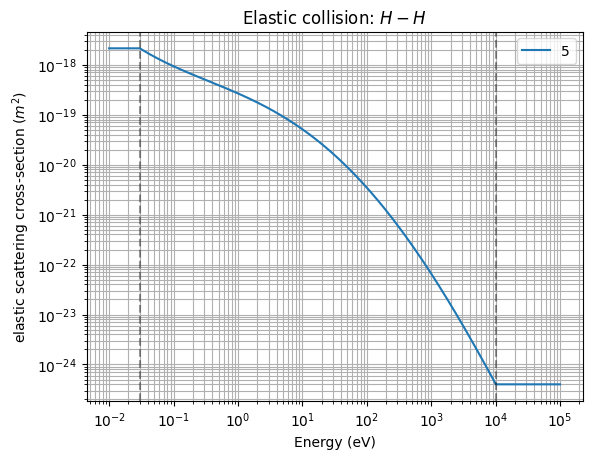

In [17]:
E = np.logspace(-2, 5, 1000)  # Desde 0.1 eV hasta 10,000 eV
def sigma_el_p_hh(E):
    E = np.asarray(E, dtype=np.float64)
    E = np.clip(E, 0.03, 1.01e4)

    a=np.flip(np.array([-3.355719e1, -5.696568e-1, -4.089556e-2, -1.143513e-2, 5.926596e-4]))

    result = np.exp(np.polyval(a,np.log(E)))*1e-4

    return result

result = sigma_el_p_hh(E)
plt.plot(E,result,label='5')
plt.title(r'Elastic collision: $H-H$')
plt.axvline(0.03  ,color='k',linestyle='--',alpha=0.4)
plt.axvline(1.01e4,color='k',linestyle='--',alpha=0.4)
plt.xlabel('Energy (eV)')
plt.ylabel(r'elastic scattering cross-section ($m^2$)')
plt.yscale('log')
plt.xscale('log')
plt.grid(True,'both')
plt.legend()
plt.show()

# sigma_v_el_h_p
### NO used on kn1d original idl version
Its implementation was aborted

In [24]:
from scipy.interpolate import RectBivariateSpline

from scipy.io import readsav

filename = 'sigmav_el_h_p_data.dat'  # Nombre del archivo
sigmav_el_h_p_data = readsav(filename)
print("Datos cargados correctamente desde el archivo IDL.")

filename = 'sigmav_el_h_p_bscoef.dat'  # Nombre del archivo
sigmav_el_h_p_bscoef = readsav(filename)
print("Datos cargados correctamente desde el archivo IDL.")

Datos cargados correctamente desde el archivo IDL.
Datos cargados correctamente desde el archivo IDL.


In [26]:
sigmav_el_h_p_data.keys(),sigmav_el_h_p_bscoef.keys()

(dict_keys(['ln_e_particle', 'ln_t_target', 'sigmav']),
 dict_keys(['eknot_el_h_p', 'tknot_el_h_p', 'order_el_h_p', 'logsigmav_el_h_p_bscoef']))

In [30]:
sigmav_el_h_p_bscoef['logsigmav_el_h_p_bscoef']

array([-32.612804, -32.28071 , -31.33191 , -29.884895, -28.99176 ,
       -28.40719 , -32.195904, -32.59347 , -31.197336, -29.904709,
       -28.99844 , -28.405596, -31.266289, -31.049582, -31.78452 ,
       -29.767376, -29.017015, -28.410416, -29.81659 , -29.90545 ,
       -29.605246, -30.315405, -28.855375, -28.399567, -28.917782,
       -28.8785  , -29.01293 , -28.69651 , -29.337826, -28.420975,
       -28.36026 , -28.358932, -28.362947, -28.353918, -28.372152,
       -28.154856], dtype='>f4')

In [29]:
sigmav_el_h_p_bscoef['tknot_el_h_p']

array([-2.3025851, -2.3025851, -2.3025851, -2.3025851,  2.5798442,
        5.0210586,  9.903606 ,  9.903606 ,  9.903606 ,  9.903606 ],
      dtype='>f4')

In [1]:
import numpy as np

# Parámetros
mE = 6
Emin = 0.1
Emax = 2.0e4
nT = 6
Tmin = 0.1
Tmax = 2.0e4
mu_particle = 1.0
mu_target = 1.0

# Malla de energía (E_particle)
E_particle = 10**(np.log10(Emin) + (np.log10(Emax) - np.log10(Emin)) * np.arange(mE) / (mE - 1))

# Malla de temperatura (T_target)
T_target = 10**(np.log10(Tmin) + (np.log10(Tmax) - np.log10(Tmin)) * np.arange(nT) / (nT - 1))

# Matriz de sección eficaz (SigmaV)
SigmaV = np.zeros((mE, nT))

print("Energías de la partícula:", E_particle)
print("Temperaturas del objetivo:", T_target)
print("Matriz de sección eficaz (inicializada a ceros):\n", SigmaV)

Energías de la partícula: [1.00000000e-01 1.14869835e+00 1.31950791e+01 1.51571657e+02
 1.74110113e+03 2.00000000e+04]
Temperaturas del objetivo: [1.00000000e-01 1.14869835e+00 1.31950791e+01 1.51571657e+02
 1.74110113e+03 2.00000000e+04]
Matriz de sección eficaz (inicializada a ceros):
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
